In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Download the dataset, process, create X, y

In [ ]:
!gdown 1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4

Downloading...
From (original): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4
From (redirected): https://drive.google.com/uc?id=1NwikiUU_Yzom-l4Kwy24Cn-bG46gMmG4&confirm=t&uuid=3dd939e9-7dda-4213-abbe-ebc61888da9f
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 76.0MB/s]


In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.info()
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df_numpy = df.to_numpy()
X = df_numpy[:, :-1].astype(np.float64)
y = df_numpy[:, -1].astype(np.uint8)

# Add bias, create one_hot

In [ ]:
col_1 = np.ones((len(X), 1))
X_bias = np.concatenate((col_1, X), axis=1)

In [ ]:
n_classes = np.unique(y).shape[0]
y_onehot = np.zeros((y.shape[0], n_classes))
y_onehot[np.arange(y.shape[0]), y] = 1

# Train test split

In [ ]:
test_val_to_all = 0.3
test_to_val = 0.1
random_state = 2
is_shuffle = True

X_train, X_val_test, y_train, y_val_test = train_test_split(
    X_bias, y_onehot,
    shuffle=is_shuffle,
    random_state=random_state,
    test_size=test_val_to_all
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test,
    shuffle=is_shuffle,
    random_state=random_state,
    test_size=test_to_val
)

# Normalize

In [ ]:
nomalizer = StandardScaler()
X_train[:, 1:] = nomalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = nomalizer.transform(X_val[:, 1:])
X_test[:, 1:] = nomalizer.transform(X_test[:, 1:])

# Start the training

In [ ]:
# Functions
# Work for stochatic, mini batch, batch
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z), axis=1)[:, None]

def predict(X, theta):
  z = np.dot(X, theta)
  y_hat = softmax(z)

  return y_hat

def compute_loss(y_hat, y):
  n = y.size

  return (-1/n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
  n = y.size

  return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
  return theta - gradient * lr

def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)

  return np.mean(np.argmax(y, axis=1) == np.argmax(y_hat, axis=1))


In [ ]:
# Hyper parameter
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [ ]:
# Start training
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  b_train_losses = []
  b_train_accs = []
  b_val_losses = []
  b_val_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i:i+batch_size, :]
    y_batch = y_train[i:i+batch_size, :]

    y_hat = predict(X_batch, theta)

    loss = compute_loss(y_hat, y_batch)

    gradient = compute_gradient(X_batch, y_batch, y_hat)

    theta = update_theta(theta, gradient, lr)

    # Update log
    # train
    b_train_losses.append(loss)
    train_acc = compute_accuracy(X_batch, y_batch, theta)
    b_train_accs.append(train_acc)

    # val
    val_y_hat = predict(X_val, theta)
    val_loss = compute_loss(val_y_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)
    b_val_losses.append(val_loss)
    b_val_accs.append(val_acc)

  b_train_mean_loss = sum(b_train_losses) / len(b_train_losses)
  b_train_mean_acc = sum(b_train_accs) / len(b_train_accs)
  b_val_mean_loss = sum(b_val_losses) / len(b_val_losses)
  b_val_mean_acc = sum(b_val_accs) / len(b_val_accs)

  train_accs.append(b_train_mean_acc)
  train_losses.append(b_train_mean_loss)
  val_accs.append(b_val_mean_acc)
  val_losses.append(b_val_mean_loss)

  print (f'\nEPOCH { epoch + 1}:\tTraining loss : { b_train_mean_loss:.3f}\tValidation loss : { b_val_mean_loss:.3f}')



EPOCH 1:	Training loss : 0.300	Validation loss : 0.298

EPOCH 2:	Training loss : 0.176	Validation loss : 0.175

EPOCH 3:	Training loss : 0.115	Validation loss : 0.114

EPOCH 4:	Training loss : 0.082	Validation loss : 0.081

EPOCH 5:	Training loss : 0.062	Validation loss : 0.062

EPOCH 6:	Training loss : 0.050	Validation loss : 0.049

EPOCH 7:	Training loss : 0.041	Validation loss : 0.041

EPOCH 8:	Training loss : 0.035	Validation loss : 0.035

EPOCH 9:	Training loss : 0.031	Validation loss : 0.031

EPOCH 10:	Training loss : 0.028	Validation loss : 0.027

EPOCH 11:	Training loss : 0.025	Validation loss : 0.025

EPOCH 12:	Training loss : 0.023	Validation loss : 0.023

EPOCH 13:	Training loss : 0.021	Validation loss : 0.021

EPOCH 14:	Training loss : 0.020	Validation loss : 0.020

EPOCH 15:	Training loss : 0.019	Validation loss : 0.018

EPOCH 16:	Training loss : 0.017	Validation loss : 0.017

EPOCH 17:	Training loss : 0.017	Validation loss : 0.016

EPOCH 18:	Training loss : 0.016	Validat

# Visualize

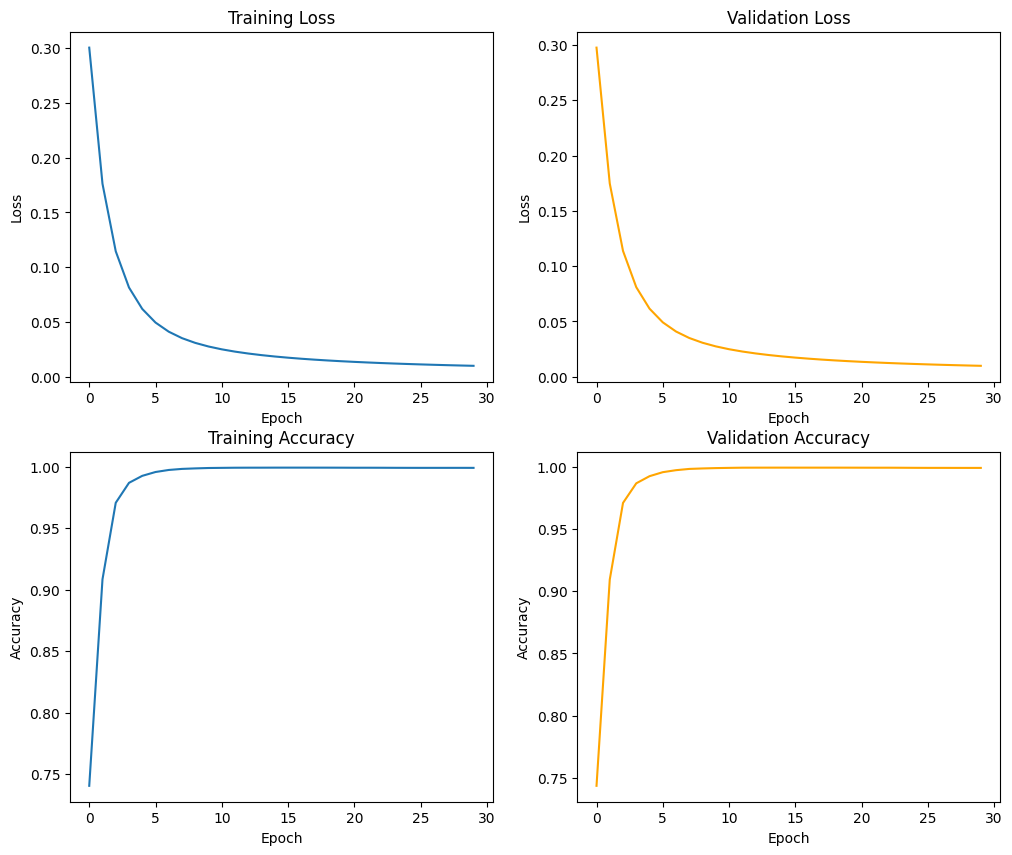

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Training Loss
ax[0, 0].plot(train_losses)
ax[0, 0].set_title('Training Loss')

# Validation Loss
ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set_title('Validation Loss')

# Training Accuracy
ax[1, 0].plot(train_accs)
ax[1, 0].set_title('Training Accuracy')

# Validation Accuracy
ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set_title('Validation Accuracy')

# Set common labels
for i in range(2):
    ax[0, i].set(xlabel='Epoch', ylabel='Loss')
    ax[1, i].set(xlabel='Epoch', ylabel='Accuracy')

plt.show()


In [13]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evaluation on validation and test set:')
print(f'Validation Set Accuracy: {val_set_acc}')
print(f'Test Set Accuracy: {test_set_acc}')


Evaluation on validation and test set:
Validation Set Accuracy: 0.9992197456370777
Test Set Accuracy: 0.9994148624926857
